# 0. The Obligatory Part

In [12]:
# Run this cell if data in Google Drive
# from google.colab import drive
# drive.mount('/content/drive')

In [13]:
# Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
from matplotlib.patches import Patch
import matplotlib.patches as patches
from matplotlib.lines import Line2D

# 1. Define Data Structure

In [14]:
# Data path: run this if data in Google Drive
# new_employee_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/new_employee.csv'
# new_task_path = '/content/drive/MyDrive/Tadika Mesra Bunga Matahari/#1 Optimization Problem/project1_task-assignment/data/new_task_1.csv'

In [15]:
# Run this if the data in Local/Repository
new_employee_path = './data/fixed_employee_data.csv'
new_task_path = './data/task_data.csv'

## 1.1 Pre-processing: Employee Data

In [16]:
# Read data
employee_df = pd.read_csv(new_employee_path, index_col='employee_id')
employee_df.drop(columns=['No', 'Role'], inplace=True, errors='ignore')

employee_df.index.tolist()
employee_df.columns[1:].tolist()

employee_df

,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,Statistics & Probabilities.A/B Testing,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
employee_id,,,,,,,,,,,,,,,,,,,,,
Talent 1,1,1,2,1,2,3,3,2,2,2,...,1,1,1,2,1,1,1,1,1,2
Talent 2,4,4,4,4,3,5,4,3,3,3,...,3,2,1,1,1,1,1,1,1,1
Talent 3,3,2,2,3,2,3,3,2,2,3,...,3,3,3,3,2,3,2,3,3,2
Talent 4,3,2,3,2,3,4,3,2,4,2,...,3,1,1,2,2,2,2,2,2,2
Talent 5,2,1,3,1,1,1,2,1,1,2,...,2,1,1,3,2,5,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Talent 107,1,4,4,3,4,3,4,4,4,4,...,5,5,5,3,5,3,4,3,4,2
Talent 108,3,3,3,3,4,2,2,2,2,3,...,4,3,4,2,3,3,2,2,3,2
Talent 109,5,5,4,5,3,4,4,3,3,3,...,5,5,5,5,5,5,5,5,5,5


## 1.2 Pre-processing: Task Data

In [17]:
task_df = pd.read_csv(new_task_path, index_col='task_id')

tasks = task_df.index.tolist()
company_names = list(set(task_df['project_id']))
story_points = task_df['story_points'].to_dict()

task_df

,project_id,story_points,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
task_id,,,,,,,,,,,,,,,,,,,,,
T1,P5,8,5,1,4,4,4,4,3,5,...,4,1,4,2,3,5,4,5,5,5
T2,P1,1,5,5,5,1,5,3,1,2,...,3,4,3,1,1,1,4,1,3,3
T3,P5,2,5,4,5,1,5,4,5,2,...,2,4,3,5,4,2,3,4,2,5
T4,P1,3,3,1,2,1,5,4,3,1,...,4,1,1,4,1,4,1,3,2,1
T5,P2,5,1,4,5,5,2,3,5,5,...,3,5,1,3,1,5,5,5,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
T296,P5,5,4,5,4,4,3,1,4,3,...,3,3,1,5,5,3,3,5,5,3
T297,P2,8,4,3,5,2,2,2,2,4,...,4,4,4,5,2,1,3,5,5,5
T298,P2,2,2,2,5,2,4,2,5,2,...,5,1,2,2,5,4,3,2,5,4


### 1.2.1 Group the task data by company/project

In [18]:
# convert to dictionary each company and its task
company_tasks = {}

for company in company_names:
  company_tasks[company] = task_df[task_df['project_id'] == company].index.tolist()

# sort the company tasks from C1 to C5
company_tasks = dict(sorted(company_tasks.items()))

company_tasks_df = pd.DataFrame.from_dict(company_tasks, orient='index')
company_tasks_df

,0,1,2,3,4,5,6,7,8,9,...,56,57,58,59,60,61,62,63,64,65
P1,T2,T4,T14,T21,T26,T29,T30,T36,T38,T40,...,None,None,None,None,None,None,None,None,None,None
P2,T5,T6,T9,T11,T19,T28,T32,T33,T44,T46,...,T260,T265,T274,T279,T283,T291,T293,T297,T298,T299
P3,T10,T23,T24,T25,T34,T48,T53,T58,T59,T68,...,T285,T286,T287,T289,T300,None,None,None,None,None
P4,T15,T20,T35,T37,T39,T43,T56,T57,T61,T70,...,None,None,None,None,None,None,None,None,None,None
P5,T1,T3,T7,T8,T12,T13,T16,T17,T18,T22,...,T241,T242,T243,T268,T276,T280,T282,T288,T296,None


# 2. Competence Assesment to Task 1

This approach will initially be applied specifically to Task 1, to validate the code and for ease of use.

## 2.1 Preprare the ACD and RCD Dataframe

**RCD or Required Competence Data** defined as Task Skill Data, and <br>
**ACD or Acquired Competence Data** defined as Employee Skill Data

### 2.1.1 RCD Dataframe

In [19]:
rcd_df = task_df.drop(columns=['project_id', 'story_points'])
rcd_df.head()

,Mathematics.Linear Algebra,Mathematics.Differential Equations,Mathematics.Optimization Technique,Mathematics.Calculus,Mathematics.Combinatorics & Graph,Statistics & Probabilities.Statistics,Statistics & Probabilities.Probability & Sampling,Statistics & Probabilities.Bayessian Method,Statistics & Probabilities.Hypothesis Testing,Statistics & Probabilities.A/B Testing,...,Data & Cloud Engineering.Data Security & Privacy,Data & Cloud Engineering.Distributed Systems,"Data & Cloud Engineering.Monitoring, Logging, Alerting",MLOPS.ML Lifecycle,MLOPS.ML Model Pipeline,MLOPS.Model Versioning,MLOPS.Automated Testing & Validation,MLOPS.Scalable Model Training,"MLOPS.Model Deployment, Monitoring, Logging",MLOPS.Ethical AI & Bias Mitigation
task_id,,,,,,,,,,,,,,,,,,,,,
T1,5,1,4,4,4,4,3,5,1,1,...,4,1,4,2,3,5,4,5,5,5
T2,5,5,5,1,5,3,1,2,2,4,...,3,4,3,1,1,1,4,1,3,3
T3,5,4,5,1,5,4,5,2,4,1,...,2,4,3,5,4,2,3,4,2,5
T4,3,1,2,1,5,4,3,1,1,2,...,4,1,1,4,1,4,1,3,2,1
T5,1,4,5,5,2,3,5,5,3,5,...,3,5,1,3,1,5,5,5,2,2


In [20]:
rcd_t1 = rcd_df.loc[['T1']]
rcd_t1.transpose()

task_id,T1
Mathematics.Linear Algebra,5
Mathematics.Differential Equations,1
Mathematics.Optimization Technique,4
Mathematics.Calculus,4
Mathematics.Combinatorics & Graph,4
...,...
MLOPS.Model Versioning,5
MLOPS.Automated Testing & Validation,4
MLOPS.Scalable Model Training,5
"MLOPS.Model Deployment, Monitoring, Logging",5


### 2.1.2 ACD Dataframe

In [21]:
# create a copy of the original DataFrame
acd_df = employee_df.copy()

acd_df.transpose()

employee_id,Talent 1,Talent 2,Talent 3,Talent 4,Talent 5,Talent 6,Talent 7,Talent 8,Talent 9,Talent 10,...,Talent 102,Talent 103,Talent 104,Talent 105,Talent 106,Talent 107,Talent 108,Talent 109,Talent 110,Talent 112
Mathematics.Linear Algebra,1.0,4.0,3.0,3.0,2.0,3.0,5.0,5.0,2.0,5.0,...,3.0,1.0,5.0,4.0,3.0,1.0,3.0,5.0,3.0,2.0
Mathematics.Differential Equations,1.0,4.0,2.0,2.0,1.0,3.0,4.0,5.0,1.0,5.0,...,3.0,1.0,5.0,4.0,3.0,4.0,3.0,5.0,3.0,2.0
Mathematics.Optimization Technique,2.0,4.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,5.0,...,3.0,2.0,5.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0
Mathematics.Calculus,1.0,4.0,3.0,2.0,1.0,2.0,4.0,5.0,1.0,5.0,...,3.0,1.0,5.0,4.0,3.0,3.0,3.0,5.0,3.0,2.0
Mathematics.Combinatorics & Graph,2.0,3.0,2.0,3.0,1.0,2.0,4.0,4.0,1.0,5.0,...,3.0,1.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLOPS.Model Versioning,1.0,1.0,3.0,2.0,5.0,2.0,3.0,4.0,2.0,5.0,...,3.0,1.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0,1.0
MLOPS.Automated Testing & Validation,1.0,1.0,2.0,2.0,2.0,3.0,3.0,5.0,3.0,5.0,...,3.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,4.0,1.0
MLOPS.Scalable Model Training,1.0,1.0,3.0,2.0,1.0,2.0,4.0,4.0,2.0,3.0,...,2.0,1.0,5.0,2.0,2.0,3.0,2.0,5.0,3.0,1.0
"MLOPS.Model Deployment, Monitoring, Logging",1.0,1.0,3.0,2.0,2.0,3.0,4.0,5.0,2.0,3.0,...,3.0,1.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0


### 2.1.3 RCD-ACD Dataframe

In [22]:
rcd_acd = pd.concat([rcd_t1, acd_df]).transpose()
rcd_acd = rcd_acd.fillna(0)
rcd_acd

,T1,Talent 1,Talent 2,Talent 3,Talent 4,Talent 5,Talent 6,Talent 7,Talent 8,Talent 9,...,Talent 102,Talent 103,Talent 104,Talent 105,Talent 106,Talent 107,Talent 108,Talent 109,Talent 110,Talent 112
Mathematics.Linear Algebra,5.0,1.0,4.0,3.0,3.0,2.0,3.0,5.0,5.0,2.0,...,3.0,1.0,5.0,4.0,3.0,1.0,3.0,5.0,3.0,2.0
Mathematics.Differential Equations,1.0,1.0,4.0,2.0,2.0,1.0,3.0,4.0,5.0,1.0,...,3.0,1.0,5.0,4.0,3.0,4.0,3.0,5.0,3.0,2.0
Mathematics.Optimization Technique,4.0,2.0,4.0,2.0,3.0,3.0,3.0,4.0,5.0,2.0,...,3.0,2.0,5.0,3.0,3.0,4.0,3.0,4.0,3.0,2.0
Mathematics.Calculus,4.0,1.0,4.0,3.0,2.0,1.0,2.0,4.0,5.0,1.0,...,3.0,1.0,5.0,4.0,3.0,3.0,3.0,5.0,3.0,2.0
Mathematics.Combinatorics & Graph,4.0,2.0,3.0,2.0,3.0,1.0,2.0,4.0,4.0,1.0,...,3.0,1.0,5.0,3.0,3.0,4.0,4.0,3.0,3.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLOPS.Model Versioning,5.0,1.0,1.0,3.0,2.0,5.0,2.0,3.0,4.0,2.0,...,3.0,1.0,5.0,4.0,2.0,3.0,3.0,5.0,3.0,1.0
MLOPS.Automated Testing & Validation,4.0,1.0,1.0,2.0,2.0,2.0,3.0,3.0,5.0,3.0,...,3.0,3.0,4.0,4.0,2.0,4.0,2.0,5.0,4.0,1.0
MLOPS.Scalable Model Training,5.0,1.0,1.0,3.0,2.0,1.0,2.0,4.0,4.0,2.0,...,2.0,1.0,5.0,2.0,2.0,3.0,2.0,5.0,3.0,1.0
"MLOPS.Model Deployment, Monitoring, Logging",5.0,1.0,1.0,3.0,2.0,2.0,3.0,4.0,5.0,2.0,...,3.0,1.0,5.0,2.0,2.0,4.0,3.0,5.0,4.0,1.0


## 2.2 PoC Weights to RCD and ACD Dataframe

**PoC or Prioritization of Competence** defines the importance and the relative weight of required competence for a specific task. Where in our case, the larger the value of RCD, the more important it's.

### 2.2.1 Calculate the PoC Weight with sum equal to 1

When the sum of weights equals 1, we can **directly compare** the weights of different elements. For Example, 0.2 is always twice as much as weight of 0.1, regardless of the context. Then, it can be **easily interpreted** as proportions/probabilities. For Example, 0.2 can be interpreted as a 20% contribution to the total. Let $R_i$ where $i = Linear Algebra, Diff. Eq., ..., n$ denotes the i-th Competency, then a generic formula of calculating weights is:
$$w_i=\frac{R_i}{\sum _{j=1}^nR_j}$$

In [23]:
required = {}
weight = {}

for i, val in rcd_acd['T1'].items():
  required[i] = val

total_req = sum(required.values())

for key, val in required.items():
  weight[key] = val/total_req

weight_df = pd.DataFrame.from_dict(weight, orient='index', columns=['weight'])
weight_df

,weight
Mathematics.Linear Algebra,0.025641
Mathematics.Differential Equations,0.005128
Mathematics.Optimization Technique,0.020513
Mathematics.Calculus,0.020513
Mathematics.Combinatorics & Graph,0.020513
...,...
MLOPS.Model Versioning,0.025641
MLOPS.Automated Testing & Validation,0.020513
MLOPS.Scalable Model Training,0.025641
"MLOPS.Model Deployment, Monitoring, Logging",0.025641


In [24]:
print(sum(weight.values()))

0.9999999999999999


### 2.2.2 Apply PoC to RCD and ACD

Since we already have a weight for every Required Competency, we can directly apply it to the RCD-ACD data. For RCD data, the calculation is as follows:
$$C_i = w_i \cdot R_i$$

and then for ACD data, the calculation is as follows:
$$C_i = w_i \cdot A_i$$

In [25]:
competency = {}
column_names = []

for k, v in rcd_acd.items():
  column_names.append(k)

for i, row in rcd_acd.iterrows():
  competency[i] = weight[i] * row.values  

# RCD and ACD with PoC Dataframe
competency_df = pd.DataFrame.from_dict(competency, orient='index', columns=column_names)
competency_df

,T1,Talent 1,Talent 2,Talent 3,Talent 4,Talent 5,Talent 6,Talent 7,Talent 8,Talent 9,...,Talent 102,Talent 103,Talent 104,Talent 105,Talent 106,Talent 107,Talent 108,Talent 109,Talent 110,Talent 112
Mathematics.Linear Algebra,0.128205,0.025641,0.102564,0.076923,0.076923,0.051282,0.076923,0.128205,0.128205,0.051282,...,0.076923,0.025641,0.128205,0.102564,0.076923,0.025641,0.076923,0.128205,0.076923,0.051282
Mathematics.Differential Equations,0.005128,0.005128,0.020513,0.010256,0.010256,0.005128,0.015385,0.020513,0.025641,0.005128,...,0.015385,0.005128,0.025641,0.020513,0.015385,0.020513,0.015385,0.025641,0.015385,0.010256
Mathematics.Optimization Technique,0.082051,0.041026,0.082051,0.041026,0.061538,0.061538,0.061538,0.082051,0.102564,0.041026,...,0.061538,0.041026,0.102564,0.061538,0.061538,0.082051,0.061538,0.082051,0.061538,0.041026
Mathematics.Calculus,0.082051,0.020513,0.082051,0.061538,0.041026,0.020513,0.041026,0.082051,0.102564,0.020513,...,0.061538,0.020513,0.102564,0.082051,0.061538,0.061538,0.061538,0.102564,0.061538,0.041026
Mathematics.Combinatorics & Graph,0.082051,0.041026,0.061538,0.041026,0.061538,0.020513,0.041026,0.082051,0.082051,0.020513,...,0.061538,0.020513,0.102564,0.061538,0.061538,0.082051,0.082051,0.061538,0.061538,0.041026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLOPS.Model Versioning,0.128205,0.025641,0.025641,0.076923,0.051282,0.128205,0.051282,0.076923,0.102564,0.051282,...,0.076923,0.025641,0.128205,0.102564,0.051282,0.076923,0.076923,0.128205,0.076923,0.025641
MLOPS.Automated Testing & Validation,0.082051,0.020513,0.020513,0.041026,0.041026,0.041026,0.061538,0.061538,0.102564,0.061538,...,0.061538,0.061538,0.082051,0.082051,0.041026,0.082051,0.041026,0.102564,0.082051,0.020513
MLOPS.Scalable Model Training,0.128205,0.025641,0.025641,0.076923,0.051282,0.025641,0.051282,0.102564,0.102564,0.051282,...,0.051282,0.025641,0.128205,0.051282,0.051282,0.076923,0.051282,0.128205,0.076923,0.025641
"MLOPS.Model Deployment, Monitoring, Logging",0.128205,0.025641,0.025641,0.076923,0.051282,0.051282,0.076923,0.102564,0.128205,0.051282,...,0.076923,0.025641,0.128205,0.051282,0.051282,0.102564,0.076923,0.128205,0.102564,0.025641


### 2.2.3 Comparing with Normalization

Comparing with normalization is a step in validating the effectiveness of the generic formula mentioned above. Normalization is a widely used technique for rescaling values, making it an appropriate benchmark for evaluating the performance of the generic formula. By comparing the results obtained from the generic formula with those achieved through normalization, we can assess the formula's ability to accurately and effectively rescale the values.

In [26]:
competency_norm = {}

for i, row in rcd_acd.iterrows():
  competency_norm[i] = preprocessing.normalize([row])[0]

competency_norm_df = pd.DataFrame.from_dict(competency_norm, orient='index', columns=column_names)
competency_norm_df

,T1,Talent 1,Talent 2,Talent 3,Talent 4,Talent 5,Talent 6,Talent 7,Talent 8,Talent 9,...,Talent 102,Talent 103,Talent 104,Talent 105,Talent 106,Talent 107,Talent 108,Talent 109,Talent 110,Talent 112
Mathematics.Linear Algebra,0.142566,0.028513,0.114053,0.085540,0.085540,0.057027,0.085540,0.142566,0.142566,0.057027,...,0.085540,0.028513,0.142566,0.114053,0.085540,0.028513,0.085540,0.142566,0.085540,0.057027
Mathematics.Differential Equations,0.031189,0.031189,0.124757,0.062378,0.062378,0.031189,0.093567,0.124757,0.155946,0.031189,...,0.093567,0.031189,0.155946,0.124757,0.093567,0.124757,0.093567,0.155946,0.093567,0.062378
Mathematics.Optimization Technique,0.123033,0.061517,0.123033,0.061517,0.092275,0.092275,0.092275,0.123033,0.153792,0.061517,...,0.092275,0.061517,0.153792,0.092275,0.092275,0.123033,0.092275,0.123033,0.092275,0.061517
Mathematics.Calculus,0.122570,0.030643,0.122570,0.091928,0.061285,0.030643,0.061285,0.122570,0.153213,0.030643,...,0.091928,0.030643,0.153213,0.122570,0.091928,0.091928,0.091928,0.153213,0.091928,0.061285
Mathematics.Combinatorics & Graph,0.128103,0.064051,0.096077,0.064051,0.096077,0.032026,0.064051,0.128103,0.128103,0.032026,...,0.096077,0.032026,0.160128,0.096077,0.096077,0.128103,0.128103,0.096077,0.096077,0.064051
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLOPS.Model Versioning,0.177780,0.035556,0.035556,0.106668,0.071112,0.177780,0.071112,0.106668,0.142224,0.071112,...,0.106668,0.035556,0.177780,0.142224,0.071112,0.106668,0.106668,0.177780,0.106668,0.035556
MLOPS.Automated Testing & Validation,0.146059,0.036515,0.036515,0.073030,0.073030,0.073030,0.109545,0.109545,0.182574,0.109545,...,0.109545,0.109545,0.146059,0.146059,0.073030,0.146059,0.073030,0.182574,0.146059,0.036515
MLOPS.Scalable Model Training,0.203616,0.040723,0.040723,0.122169,0.081446,0.040723,0.081446,0.162893,0.162893,0.081446,...,0.081446,0.040723,0.203616,0.081446,0.081446,0.122169,0.081446,0.203616,0.122169,0.040723
"MLOPS.Model Deployment, Monitoring, Logging",0.184679,0.036936,0.036936,0.110808,0.073872,0.073872,0.110808,0.147743,0.184679,0.073872,...,0.110808,0.036936,0.184679,0.073872,0.073872,0.147743,0.110808,0.184679,0.147743,0.036936


#### 2.2.3.1 Why Shouldn't We Use Normalization? Does the Sum of 'Weights' in Normalization Equal 1?

## 2.3 Evaluation Phase: Gap Function

The Gap Function, $g(a,r)$, is a cost function that quantifies the gap between ACD and RCD scores in the competence domain. This is inspired by regression-based problems where the error is defined as: $$e_i = \hat{y}_i - y_i$$ In this case, we use the Simple Gap (SG), defined as: $$g_i(a,r) = A_i - R_i$$

In [27]:
# create a copy of the original DataFrame
gap_df = competency_df.copy()

# calculate gap scores in gap_df between every acquired competence and required T1
for col in gap_df.columns:
  if col != 'T1':
    # gap = acquired - required
    gap_df[col] = gap_df[col] - gap_df['T1']

# drop the 'T1' column
gap_df = gap_df.drop(columns=['T1'])

gap_df

,Talent 1,Talent 2,Talent 3,Talent 4,Talent 5,Talent 6,Talent 7,Talent 8,Talent 9,Talent 10,...,Talent 102,Talent 103,Talent 104,Talent 105,Talent 106,Talent 107,Talent 108,Talent 109,Talent 110,Talent 112
Mathematics.Linear Algebra,-0.102564,-0.025641,-0.051282,-0.051282,-0.076923,-0.051282,0.000000,0.000000,-0.076923,0.000000,...,-0.051282,-0.102564,0.000000,-0.025641,-0.051282,-0.102564,-0.051282,0.000000,-0.051282,-0.076923
Mathematics.Differential Equations,0.000000,0.015385,0.005128,0.005128,0.000000,0.010256,0.015385,0.020513,0.000000,0.020513,...,0.010256,0.000000,0.020513,0.015385,0.010256,0.015385,0.010256,0.020513,0.010256,0.005128
Mathematics.Optimization Technique,-0.041026,0.000000,-0.041026,-0.020513,-0.020513,-0.020513,0.000000,0.020513,-0.041026,0.020513,...,-0.020513,-0.041026,0.020513,-0.020513,-0.020513,0.000000,-0.020513,0.000000,-0.020513,-0.041026
Mathematics.Calculus,-0.061538,0.000000,-0.020513,-0.041026,-0.061538,-0.041026,0.000000,0.020513,-0.061538,0.020513,...,-0.020513,-0.061538,0.020513,0.000000,-0.020513,-0.020513,-0.020513,0.020513,-0.020513,-0.041026
Mathematics.Combinatorics & Graph,-0.041026,-0.020513,-0.041026,-0.020513,-0.061538,-0.041026,0.000000,0.000000,-0.061538,0.020513,...,-0.020513,-0.061538,0.020513,-0.020513,-0.020513,0.000000,0.000000,-0.020513,-0.020513,-0.041026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MLOPS.Model Versioning,-0.102564,-0.102564,-0.051282,-0.076923,0.000000,-0.076923,-0.051282,-0.025641,-0.076923,0.000000,...,-0.051282,-0.102564,0.000000,-0.025641,-0.076923,-0.051282,-0.051282,0.000000,-0.051282,-0.102564
MLOPS.Automated Testing & Validation,-0.061538,-0.061538,-0.041026,-0.041026,-0.041026,-0.020513,-0.020513,0.020513,-0.020513,0.020513,...,-0.020513,-0.020513,0.000000,0.000000,-0.041026,0.000000,-0.041026,0.020513,0.000000,-0.061538
MLOPS.Scalable Model Training,-0.102564,-0.102564,-0.051282,-0.076923,-0.102564,-0.076923,-0.025641,-0.025641,-0.076923,-0.051282,...,-0.076923,-0.102564,0.000000,-0.076923,-0.076923,-0.051282,-0.076923,0.000000,-0.051282,-0.102564
"MLOPS.Model Deployment, Monitoring, Logging",-0.102564,-0.102564,-0.051282,-0.076923,-0.076923,-0.051282,-0.025641,0.000000,-0.076923,-0.051282,...,-0.051282,-0.102564,0.000000,-0.076923,-0.076923,-0.025641,-0.051282,0.000000,-0.025641,-0.102564


## 2.4 Evaluation-Phase: Qualification Space

Towards on *Regression Operating Characteristic (ROC)* space, we can define similarly define the *Qualification Space (QS)* as two-dimensional plot for every specific candidate. Where the x-axis represents the weighted **sum of over-qualification (SOQ)** and the y-axis represents the weighted **sum of under-qualification (SUQ)** with simple gap function.

### 2.4.1 Calculate the SOQ and SUQ

$$SOQ=\sum _{i=0}\left\{g_i | g_i\ge 0\right\}=\sum _{i=0}^n\left\{w_i\left(A_i-R_i\right) | \left(A_i-R_i\right)\ge 0 \right\}$$
$$SUQ=\sum _{i=0}\left\{g_i | g_i < 0\right\}=\sum _{i=0}^n\left\{w_i\left(A_i-R_i\right) | \left(A_i-R_i\right) < 0 \right\}$$

In [28]:
# QualificationSpace[talent] = {SOQ, SUQ}
qs = {}

for j, competence in gap_df.items():
  soq, suq = 0, 0
  
  for value in competence.values:    
    if value >= 0:
      soq += value
    else:
      suq += value
  
  qs[j] = [soq, suq]

qs_df = pd.DataFrame.from_dict(qs, orient='index', columns=['SOQ', 'SUQ'])
qs_df

,SOQ,SUQ
Talent 1,0.071795,-2.035897
Talent 2,0.220513,-1.425641
Talent 3,0.215385,-1.374359
Talent 4,0.256410,-1.343590
Talent 5,0.158974,-2.169231
...,...,...
Talent 107,0.682051,-0.682051
Talent 108,0.246154,-1.138462
Talent 109,0.958974,-0.312821
Talent 110,0.451282,-0.723077


### 2.4.2 Visualization of Qualification Space

Despite the need for well-established mathematical concepts that quantify the gap between the ACD and RCD scores, there is also an imperative need to develop and adapt highly readable and
easily-interpretable visualization mechanisms. Towards this direction, *Regression Receiver Operating Characteristic (RROC)* space is used in order to graphically represent over-estimation against under-estimation of prediciton models.

#### 2.4.2.1 Initial Scatter Plot of Data

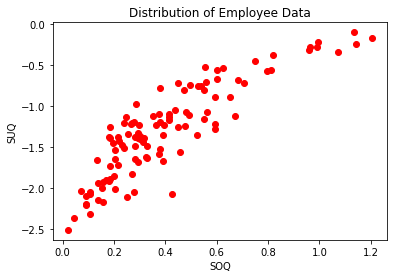

In [29]:
%matplotlib inline
plt.title('Distribution of Employee Data')
plt.xlabel('SOQ')
plt.ylabel('SUQ')
plt.scatter(qs_df.SOQ, qs_df.SUQ, color='red')

#### 2.5.2.2 RROC Space

The Regression Receiver Operating Characteristic (RROC) space is defined as a plot where we depict total over-estimation (OVER or in our case is SOQ) on the x-axis and total under-estimation (UNDER or in our case is SUQ) on the y-axis. Since OVER is always positive (but unbounded) and UNDER is always negative (but unbounded), we will typically place the point $(0,0)$ on the upper left corner (the RROC heaven), and will clip both the
x-axis and y-axis as necessary to show the region of interest. In RROC space we denote the regression model always outputting $\infty $ and the model always outputting $-\infty $ as the (trivial) extreme regression models, which fall at $(0, -\infty)$ and $(\infty, 0)$ respectively in RROC space.

In [30]:
# since we know RROC space fall at (0, -∞) and (∞, 0)
# minium value of SOQ and maximum value of SUQ in every condition is equal to 0
# so we only need the value of max_soq and min_suq
max_soq = abs(qs_df['SOQ'].max())
min_suq = abs(qs_df['SUQ'].min())

max_points = max(max_soq, min_suq) + 0.1

Occasionally, we draw a diagonal line where $OVER + UNDER = 0$, or in our case, $SOQ + SUQ = 0$. This line illustrates the points where under-estimation equals over-estimation. Let's denote $x$ as SOQ and $y$ as SUQ. The generic formula for linear regression is: $$y = mx + c$$

If $x + y = 0$, this can be rearranged to $y = -x$. This gives us the linear regression formula: $$y = -1 \cdot x + 0$$

In this case, the slope ($m$) of the line is consistently -1, and it always intersects the origin/the RROC heaven $(0, 0)$ where the y-intercept ($c$) is 0. Therefore, the concept of drawing a diagonal line where $SOQ + SUQ = 0$ is mathematically valid because can be applied to the linear regression formula. This line can also be referred to as the **Threshold of qualification for a task**.

For implementation in the code, we need an $x$ that spans a linear space from 0 and is bounded by `max_points` for visualization purposes, with $y$ simply defined as $-x$. We then create two plots: one to visualize the fitted data, and a zoomed-out plot to observe the Region of Interest (ROI) within our RROC Space.

In [31]:
# create an array for the x values
x = np.linspace(0, max_points, 100)                                 # full-version
x_fit = np.linspace(min(qs_df.SOQ), max(qs_df.SOQ), 100)  # fitted-version

# since SOQ + SUQ = 0, SUQ = -SOQ. So, the y values will be the negative of the x values
y = -x          # full-version
y_fit = -x_fit  # fitted-version

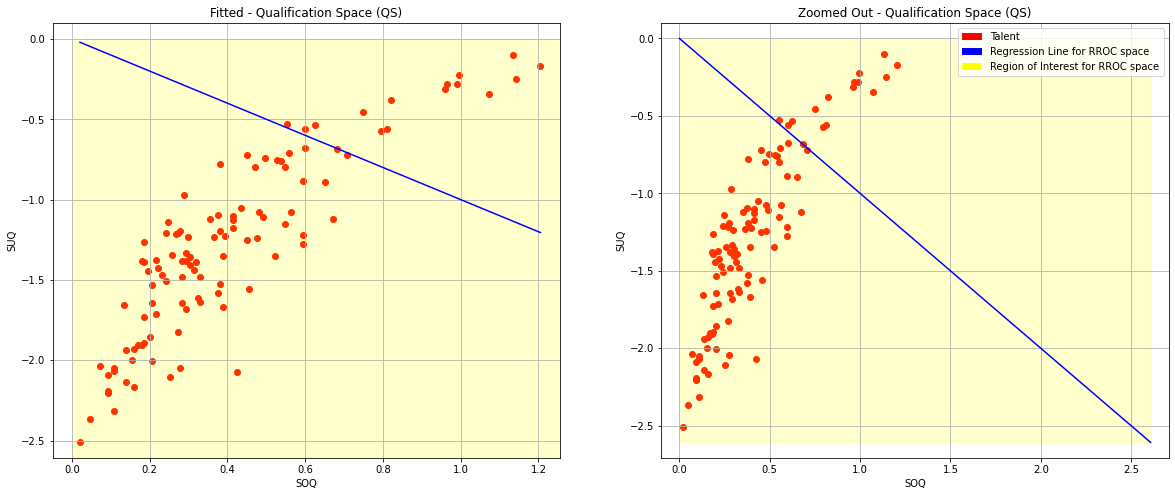

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# set for ax[0]
ax[0].set_xlabel('SOQ')
ax[0].set_ylabel('SUQ')
ax[0].set_title('Fitted - Qualification Space (QS)')

# set the limits of x-axis and y-axis in ax[0]
ax[0].set_xlim([0-0.05, max_soq+0.05])
ax[0].set_ylim([-min_suq-0.1, 0+0.1])

# plot the employee data in scatter plot ax[0]
ax[0].scatter(qs_df.SOQ, qs_df.SUQ, color='red')

# plot the diagonal line in ax[0]
ax[0].plot(x_fit, y_fit, color='blue')

ax[0].fill_between(x, 0, -min_suq-0.1, interpolate=True, color='yellow', alpha=0.2)
ax[0].grid()

# set for ax[1]
ax[1].set_xlabel('SOQ')
ax[1].set_ylabel('SUQ')
ax[1].set_title('Zoomed Out - Qualification Space (QS)')

# set the limits of x-axis and y-axis in ax[1]
ax[1].set_xlim([0-0.1, max_points+0.1])
ax[1].set_ylim([-max_points-0.1, 0+0.1])

# plot the employee data in scatter plot ax[1]
ax[1].scatter(qs_df.SOQ, qs_df.SUQ, color='red')

# plot the diagonal line in ax[1]
ax[1].plot(x, y, color='blue')

ax[1].fill_between(x, 0, -max_points, interpolate=True, color='yellow', alpha=0.2)
ax[1].grid()

# create legend elements
legend_elements = [Patch(facecolor='red', label='Talent'),
                   Patch(facecolor='blue', label='Regression Line for RROC space'),
                   Patch(facecolor='yellow', label='Region of Interest for RROC space')]

# add the legend to ax[1]
ax[1].legend(handles=legend_elements)

plt.show()

### 2.4.3 Calculate Mean Simple Gap (MSG)

We can quantify the visual information gained from the QS plot by defining overall measures of the gap for each assessment through the SOQ and SUQ values. This is inspired by: $$\mu(e) = \frac{\:1}{n}\sum _{i=0}^n\left(\hat{y}_i-y_i\right)$$ also known as the mean error or Mean Error Bias (MAB). In this case, we use the Mean Simple Gap (MSG).

$$MSG=\frac{\sum _{i=1}^ng_i}{n}=\frac{SOQ+SUQ}{n}$$

From the RROC space threshold, we can determine that **any talent with an $MSG >= 0$ is over the qualification for a task.**

In [33]:
# in this section, QS dictionary will increase by 1 metrics which is MSG
# QualificationSpace[talent] = {SOQ, SUQ, MSG}

# calculate the sum of competency first
n = len(gap_df.index)

# calculate the msg
for j, v in qs.items():  
  soq, suq = v[0], v[1]
  msg = (soq + suq) / n
  qs[j] += [msg]
  
  if msg >= 0:
    qs[j] += ['Qualified']
  else:
    qs[j] += ['Under-Qualified']

qs_df = pd.DataFrame.from_dict(qs, orient='index', columns=['SOQ', 'SUQ', 'MSG', 'Qualification'])
qs_df

,SOQ,SUQ,MSG,Qualification
Talent 1,0.071795,-2.035897,-3.021696e-02,Under-Qualified
Talent 2,0.220513,-1.425641,-1.854043e-02,Under-Qualified
Talent 3,0.215385,-1.374359,-1.783037e-02,Under-Qualified
Talent 4,0.256410,-1.343590,-1.672584e-02,Under-Qualified
Talent 5,0.158974,-2.169231,-3.092702e-02,Under-Qualified
...,...,...,...,...
Talent 107,0.682051,-0.682051,3.416071e-18,Qualified
Talent 108,0.246154,-1.138462,-1.372781e-02,Under-Qualified
Talent 109,0.958974,-0.312821,9.940828e-03,Qualified
Talent 110,0.451282,-0.723077,-4.181460e-03,Under-Qualified


## 2.5 Assesment Phase

After the EP of the asseses, the objective of the AP is the ranking of the candidates according to ACD and RCD of a specific position.

### 2.5.1 Ranking of Candidates

In [34]:
ranking_df = qs_df.sort_values('MSG', ascending=False)
ranking_df

,SOQ,SUQ,MSG,Qualification
Talent 104,1.205128,-0.169231,0.015937,Qualified
Talent 99,1.133333,-0.102564,0.015858,Qualified
Talent 8,1.143590,-0.251282,0.013728,Qualified
Talent 73,0.994872,-0.225641,0.011834,Qualified
Talent 10,1.071795,-0.343590,0.011203,Qualified
...,...,...,...,...
Talent 85,0.092308,-2.194872,-0.032347,Under-Qualified
Talent 34,0.092308,-2.205128,-0.032505,Under-Qualified
Talent 82,0.107692,-2.317949,-0.034004,Under-Qualified
Talent 17,0.046154,-2.364103,-0.035661,Under-Qualified


from the dataframe above, we can conclude that **Task 1 is properly assigned to Talent 104**, because Talent 104 has the highest MSG value. Additionally, from the dataframe, we can identify the employees who are over-qualified and under-qualified for Task 1.

### 2.5.3 The Conclusion of The Assesment

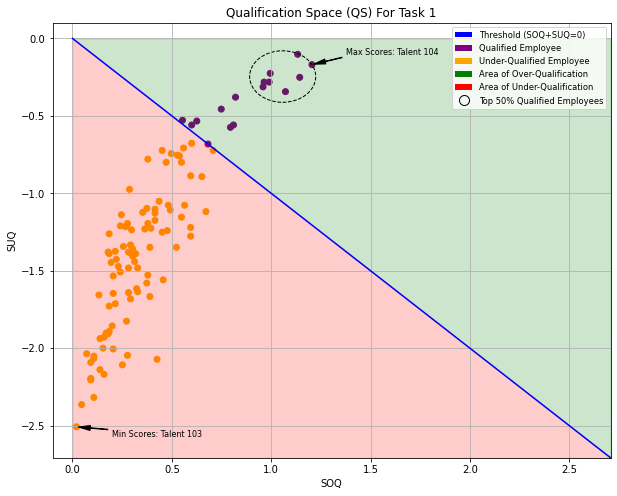

In [35]:
fig, ax = plt.subplots(figsize=(10, 8))

ax.set_title('Qualification Space (QS) For Task 1')
ax.set_xlabel('SOQ')
ax.set_ylabel('SUQ')

# set the limits of x-axis and y-axis
offset = 0.1
ax.set_xlim([0-offset, max_points+offset])
ax.set_ylim([-max_points-offset, 0+offset])

# create a color map based on the condition of ranking_df.MSG
colors = ['purple' if msg >= 0 else 'orange' for msg in ranking_df.MSG]

# scatter plot of SOQ and SUQ with color map
ax.scatter(ranking_df.SOQ, ranking_df.SUQ, color=colors)

# Fill color for each qualification
x = np.linspace(-offset, max_points, 100)
y = -x
ax.fill_between(x+offset, y-offset, 0, interpolate=True, color='green', alpha=0.2)
ax.fill_between(x+offset, y-offset, -max_points-offset, interpolate=True, color='red', alpha=0.2)

# plot the diagonal line
ax.plot(x+offset, y-offset, color='blue')

# create legend
legend_elements = [Patch(facecolor='blue', label='Threshold (SOQ+SUQ=0)'),
                   Patch(facecolor='purple', label='Qualified Employee'),
                   Patch(facecolor='orange', label='Under-Qualified Employee'),
                   Patch(facecolor='green', label='Area of Over-Qualification'),
                   Patch(facecolor='red', label='Area of Under-Qualification'),
                   Line2D([0], [0], marker='o', color='w', label='Top 50% Qualified Employees',
                          markerfacecolor='none', markeredgecolor='black', markeredgewidth=1, markersize=10, linestyle='dashed')]

# Add legend with smaller font size
ax.legend(handles=legend_elements, loc='upper right', fontsize='small')

# Find the index of the max and min MSG
max_msg_index = ranking_df.MSG.idxmax()
min_msg_index = ranking_df.MSG.idxmin()

# Annotate the points with max and min MSG with larger font size, adjusted position, and a thinner arrow with a smaller head
ax.annotate(f'Max Scores: {max_msg_index}', (ranking_df.SOQ[max_msg_index], ranking_df.SUQ[max_msg_index]), textcoords="offset points", xytext=(80,10), ha='center', fontsize=8, arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5))
ax.annotate(f'Min Scores: {min_msg_index}', (ranking_df.SOQ[min_msg_index], ranking_df.SUQ[min_msg_index]), textcoords="offset points", xytext=(80,-10), ha='center', fontsize=8, arrowprops=dict(facecolor='black', shrink=0.05, width=0.5, headwidth=5))

# collect MSG >= 0 data to variable "j_qualified"
j_qualified = ranking_df[ranking_df.MSG >= 0]

# get the top 50% highest of j_qualified
top_j = j_qualified.nlargest(int(len(j_qualified) * 0.50), 'MSG')

# calculate the center and radius of the circle that contains all points
center = top_j[['SOQ', 'SUQ']].mean().values
radius = max(np.sqrt(((top_j[['SOQ', 'SUQ']] - center)**2).sum(axis=1)))

# add a circle to points that meet j_qualified
circle = patches.Circle(center, radius, fill=False, linestyle='dashed')
ax.add_patch(circle)
ax.grid()

plt.show()

In conclusion, **Talent 104 is the most suitable candidate for Task 1**, as Talent 104 have the highest MSG score of 0.015937. The Qualification Space (QS) also allows us to identify employees who are either under-qualified or over-qualified. Furthermore, we have marked the top 50% of qualified employees with a dashed circle.

#### 2.5.3.1 Top 50% Qualified Employee

In [36]:
top_j

,SOQ,SUQ,MSG,Qualification
Talent 104,1.205128,-0.169231,0.015937,Qualified
Talent 99,1.133333,-0.102564,0.015858,Qualified
Talent 8,1.143590,-0.251282,0.013728,Qualified
Talent 73,0.994872,-0.225641,0.011834,Qualified
Talent 10,1.071795,-0.343590,0.011203,Qualified
Talent 21,0.989744,-0.282051,0.010888,Qualified
Talent 62,0.964103,-0.282051,0.010493,Qualified
Talent 109,0.958974,-0.312821,0.009941,Qualified


#### 2.5.3.2 Overall Qualified Employee

In [37]:
j_qualified

,SOQ,SUQ,MSG,Qualification
Talent 104,1.205128,-0.169231,1.593688e-02,Qualified
Talent 99,1.133333,-0.102564,1.585799e-02,Qualified
Talent 8,1.143590,-0.251282,1.372781e-02,Qualified
Talent 73,0.994872,-0.225641,1.183432e-02,Qualified
Talent 10,1.071795,-0.343590,1.120316e-02,Qualified
Talent 21,0.989744,-0.282051,1.088757e-02,Qualified
Talent 62,0.964103,-0.282051,1.049310e-02,Qualified
Talent 109,0.958974,-0.312821,9.940828e-03,Qualified
Talent 92,0.820513,-0.379487,6.785010e-03,Qualified
Talent 39,0.748718,-0.456410,4.497041e-03,Qualified
